In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import normalize,scale,MinMaxScaler
import os
from scipy.linalg import svd
from PIL import Image
# from skimage.transform import resize

## Question 1

## a)

In [2]:
m = 10
A = np.random.rand(m,m)
M = np.tril(A,-1) + np.tril(A).T
M

array([[0.73116646, 0.62907116, 0.16452016, 0.5765387 , 0.70192508,
        0.27433536, 0.22838154, 0.22423693, 0.22831891, 0.70532285],
       [0.62907116, 0.23073898, 0.39902204, 0.3842151 , 0.72223179,
        0.67785057, 0.51674664, 0.45401715, 0.47638217, 0.60546062],
       [0.16452016, 0.39902204, 0.83658948, 0.26836288, 0.50630421,
        0.16390962, 0.57975015, 0.07799619, 0.72678209, 0.87084353],
       [0.5765387 , 0.3842151 , 0.26836288, 0.48270386, 0.02779108,
        0.81753665, 0.26457565, 0.90481267, 0.00858426, 0.05584303],
       [0.70192508, 0.72223179, 0.50630421, 0.02779108, 0.15602759,
        0.29481824, 0.728704  , 0.94355865, 0.70333783, 0.47690603],
       [0.27433536, 0.67785057, 0.16390962, 0.81753665, 0.29481824,
        0.42216362, 0.41792832, 0.38484946, 0.13807172, 0.51841103],
       [0.22838154, 0.51674664, 0.57975015, 0.26457565, 0.728704  ,
        0.41792832, 0.07251006, 0.96906634, 0.64738459, 0.54758743],
       [0.22423693, 0.45401715, 0.0779961

In [3]:
eig_values, eig_vectors = np.linalg.eig(M)

In [4]:
eig_values

array([ 4.71664817,  1.43070783, -1.37406418,  0.69604427,  0.53832659,
        0.08934167, -0.80789997, -0.67592348, -0.48184403, -0.33588529])

In [5]:
eig_vectors

array([[-3.00654946e-01, -1.67216645e-01, -2.35948305e-01,
         7.03227375e-01, -3.51328518e-01,  3.20974786e-01,
        -2.78229329e-01, -1.32400962e-01,  7.38590682e-02,
        -6.77611734e-02],
       [-3.40732329e-01, -7.68303673e-02, -4.41287998e-02,
         1.47793651e-01, -5.91123608e-02, -3.77391182e-01,
        -1.57212071e-02,  5.32049704e-01, -3.52709140e-01,
         5.48235445e-01],
       [-3.16626507e-01,  4.71211330e-01, -2.02147526e-01,
        -2.26070291e-02,  5.27802046e-01,  4.29421238e-01,
        -1.01693950e-02, -1.23429813e-01,  8.79494905e-02,
         3.87661953e-01],
       [-2.40234759e-01, -5.56449581e-01,  4.32720651e-01,
        -2.74288246e-02,  3.70589765e-01,  4.16303788e-01,
         7.62088564e-02,  1.07848709e-01, -3.03542340e-01,
        -1.56297532e-01],
       [-3.58321360e-01,  6.73116494e-02,  4.63538036e-01,
        -1.31433887e-01, -4.43182391e-01, -2.32597456e-04,
         3.42610603e-01, -4.71191801e-01,  5.00370418e-02,
         3.

In [6]:
# LARGEST EIGENVALUE AND THE CORRESPONDING EIGENVECTOR
print(eig_values[0])
print(eig_vectors[:,0])

4.716648172209673
[-0.30065495 -0.34073233 -0.31662651 -0.24023476 -0.35832136 -0.26919579
 -0.33722983 -0.31637918 -0.30980308 -0.35339035]


## b)

4.716648172208912
[0.30065504 0.34073237 0.31662629 0.240235   0.35832131 0.26919597
 0.3372298  0.31637935 0.30980291 0.3533902 ]


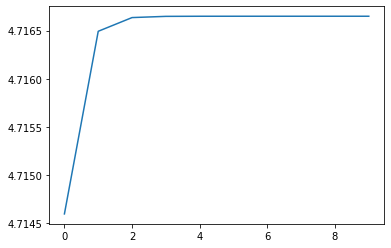

In [7]:
# POWER ITERATION
num_it = 10
it_value = np.zeros(num_it)
it_vector = np.ones(m)
for i in range(num_it):
    it_vector = np.dot(M,it_vector)
    it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value[i] = np.linalg.multi_dot([it_vector.T,M,it_vector])

print(it_value[-1])
print(it_vector)
plt.plot(it_value)  

#### Conclusion: Power iteration was able to find the largest eigenvalue and the corresponding eigenvector accurately for a symmetric matrix

## c)

0.6960442688786567
[-0.70322738 -0.14779365  0.02260703  0.02742882  0.13143389 -0.06238097
  0.38096825  0.46770827  0.13258651 -0.28236787]


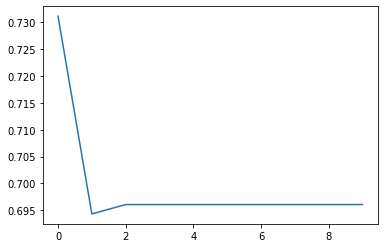

In [8]:
# Rayleigh Quotient iteration initial guess [1,0,0,0,0,0,0,0,0,0]
num_it = 10
it_value = np.zeros(num_it)
it_vector = np.zeros(m) # initial vector guess
it_vector[0] = 1
for i in range(num_it):
    it_value[i] = np.linalg.multi_dot([it_vector.T,M,it_vector])
    it_vector = np.dot(np.linalg.inv(M-it_value[i]*np.eye(m)),it_vector)
    it_vector = it_vector/np.linalg.norm(it_vector,2)
    

print(it_value[-1])
print(it_vector)
plt.plot(it_value)  

0.5383265871470685
[-0.35132852 -0.05911236  0.52780205  0.37058977 -0.44318239  0.41874449
 -0.10717882 -0.22561324 -0.07527762  0.13171672]


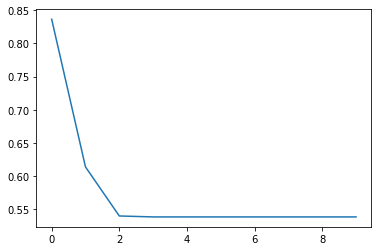

In [9]:
# Rayleigh Quotient iteration initial guess [0,0,1,0,0,0,0,0,0,0]
num_it = 10
it_value = np.zeros(num_it)
it_vector = np.zeros(m) # initial vector guess
it_vector[2] = 1
for i in range(num_it):
    it_value[i] = np.linalg.multi_dot([it_vector.T,M,it_vector])
    it_vector = np.dot(np.linalg.inv(M-it_value[i]*np.eye(m)),it_vector)
    it_vector = it_vector/np.linalg.norm(it_vector,2)
    

print(it_value[-1])
print(it_vector)
plt.plot(it_value)  

0.08934167210940318
[ 3.20974786e-01 -3.77391182e-01  4.29421238e-01  4.16303788e-01
 -2.32597456e-04 -5.63673612e-01 -2.28050653e-02  1.76147714e-01
 -1.05233760e-01 -1.91022020e-01]


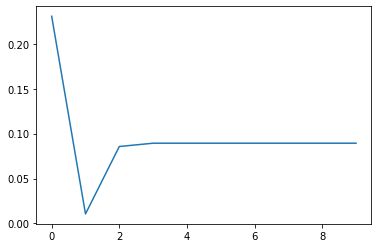

In [11]:
# Rayleigh Quotient iteration initial guess [0,1,0,0,0,0,0,0,0,0]
num_it = 10
it_value = np.zeros(num_it)
it_vector = np.zeros(m) # initial vector guess
it_vector[1] = 1
for i in range(num_it):
    it_value[i] = np.linalg.multi_dot([it_vector.T,M,it_vector])
    it_vector = np.dot(np.linalg.inv(M-it_value[i]*np.eye(m)),it_vector)
    it_vector = it_vector/np.linalg.norm(it_vector,2)
    

print(it_value[-1])
print(it_vector)
plt.plot(it_value)  

In [43]:
num_it = 10
it_values = []
it_vectors = []

# Try standard basis vectors
for i in range(m):
    it_vector = np.zeros(m) # initial vector guess
    it_vector[i] = 1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)
        
# Try vectors
for i in range(m):
    it_vector = np.zeros(m) # initial vector guess
    it_vector[i] = -1
    it_vector[np.mod(i+2,10)] = 2
    it_vector[np.mod(i+4,10)] = -1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)

        
# Try vectors
for i in range(m):
    it_vector = np.ones(m) # initial vector guess
    it_vector[i] = -1
    it_vector[np.mod(i+1,10)] = -1
    it_vector[np.mod(i+2,10)] = -1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)
        
# Try vectors
for i in range(m):
    it_vector = np.ones(m) # initial vector guess
    it_vector[i] = -1
    it_vector[np.mod(i+1,10)] = -1
    it_vector[np.mod(i+4,10)] = -1
    it_vector[np.mod(i+5,10)] = -1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)
        
# Try these vectors
for i in range(m):
    it_vector = np.zeros(m) # initial vector guess
    it_vector[np.mod(i+1,10)] = 1
    it_vector[np.mod(i+2,10)] = 1
    it_vector[np.mod(i+3,10)] = -1
    it_vector[np.mod(i+4,10)] = 1
    it_vector[np.mod(i+6,10)] = -1
    it_vector[np.mod(i+8,10)] = -1
    it_vector[np.mod(i+9,10)] = -1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)

# PRINT ALL EIGENVECTORS AND EIGENVALUES
print(len(it_values))
sorted(zip(it_values,it_vectors),reverse=True)

10


[(4.716648172,
  array([0.30065495, 0.34073233, 0.31662651, 0.24023476, 0.35832136,
         0.26919579, 0.33722983, 0.31637918, 0.30980308, 0.35339035])),
 (1.430707827,
  array([ 0.16721665,  0.07683037, -0.47121133,  0.55644958, -0.06731165,
          0.35439723, -0.03872123,  0.29764191, -0.36729903, -0.28166037])),
 (0.696044269,
  array([-0.70322738, -0.14779365,  0.02260703,  0.02742882,  0.13143389,
         -0.06238097,  0.38096825,  0.46770827,  0.13258651, -0.28236787])),
 (0.538326587,
  array([-0.35132852, -0.05911236,  0.52780205,  0.37058977, -0.44318239,
          0.41874449, -0.10717882, -0.22561324, -0.07527762,  0.13171672])),
 (0.089341672,
  array([ 3.20974786e-01, -3.77391182e-01,  4.29421238e-01,  4.16303788e-01,
         -2.32597456e-04, -5.63673612e-01, -2.28050653e-02,  1.76147714e-01,
         -1.05233760e-01, -1.91022020e-01])),
 (-0.335885291,
  array([ 0.06776117, -0.54823545, -0.38766195,  0.15629753, -0.31082863,
          0.01798766,  0.0818918 ,  0.100

#### Comments: In general this method was very fast, convering into a solution with 3-4 iterations, I continued for 10 iterations. The results were accurate up to 12 digits with 10 iterations. This conclusion I reached by comparing with the ground truth. It was not easy to make initial guesses of eigenvectors.  I made 50 guess above to find all 10 eigenvalues.

## d)

#### Create a matrix that is not symmetric

In [67]:
m = 10
A = np.random.rand(m,m)

In [68]:
eig_values, eig_vectors = np.linalg.eig(A)

In [69]:
eig_values

array([ 4.95026733+0.j        , -1.00316916+0.j        ,
       -0.58456431+0.20970639j, -0.58456431-0.20970639j,
        0.28137065+0.89682175j,  0.28137065-0.89682175j,
        0.21512884+0.25627644j,  0.21512884-0.25627644j,
        0.52073042+0.07609933j,  0.52073042-0.07609933j])

In [62]:
eig_vectors

array([[-3.58458577e-01+0.j        , -6.59384368e-02+0.j        ,
         5.86446440e-01+0.j        ,  2.07298680e-01-0.33779405j,
         2.07298680e-01+0.33779405j, -2.28266130e-01+0.01533379j,
        -2.28266130e-01-0.01533379j, -1.99781958e-01-0.1126855j ,
        -1.99781958e-01+0.1126855j , -1.44158337e-01+0.j        ],
       [-3.54860104e-01+0.j        , -2.87933270e-01+0.j        ,
         5.02866083e-01+0.j        ,  1.52055603e-01+0.32908621j,
         1.52055603e-01-0.32908621j,  5.27415751e-01+0.j        ,
         5.27415751e-01-0.j        ,  7.55630641e-02+0.17406941j,
         7.55630641e-02-0.17406941j, -6.31128817e-01+0.j        ],
       [-3.01889252e-01+0.j        ,  5.96920825e-01+0.j        ,
        -1.00828500e-01+0.j        ,  1.61995972e-01+0.07637886j,
         1.61995972e-01-0.07637886j, -2.61859999e-01+0.26875857j,
        -2.61859999e-01-0.26875857j,  9.88905615e-02-0.30079059j,
         9.88905615e-02+0.30079059j,  1.22417292e-02+0.j        ],
       

#### User power iteration to find the largest eigenvalues

4.661169645185953
[0.35845858 0.35486011 0.30188925 0.26229573 0.33486739 0.29667005
 0.36640964 0.3335317  0.19773144 0.31764629]


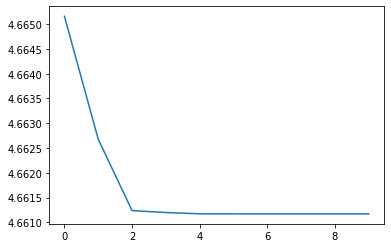

In [63]:
# POWER ITERATION
num_it = 10
it_value = np.zeros(num_it)
it_vector = np.ones(m)
for i in range(num_it):
    it_vector = np.dot(A,it_vector)
    it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value[i] = np.linalg.multi_dot([it_vector.T,A,it_vector])

print(it_value[-1])
print(it_vector)
plt.plot(it_value)  

#### Rayleigh Quotient iterations

In [72]:
num_it = 100
it_values = []
it_vectors = []
M =A.copy()
# Try standard basis vectors
for i in range(m):
    it_vector = np.zeros(m) # initial vector guess
    it_vector[i] = 1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)
        
# Try vectors
for i in range(m):
    it_vector = np.zeros(m) # initial vector guess
    it_vector[i] = -1
    it_vector[np.mod(i+2,10)] = 2
    it_vector[np.mod(i+4,10)] = -1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)

        
# Try vectors
for i in range(m):
    it_vector = np.ones(m) # initial vector guess
    it_vector[i] = -1
    it_vector[np.mod(i+1,10)] = -1
    it_vector[np.mod(i+2,10)] = -1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)
        
# Try vectors
for i in range(m):
    it_vector = np.ones(m) # initial vector guess
    it_vector[i] = -1
    it_vector[np.mod(i+1,10)] = -1
    it_vector[np.mod(i+4,10)] = -1
    it_vector[np.mod(i+5,10)] = -1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)
        
# Try these vectors
for i in range(m):
    it_vector = np.zeros(m) # initial vector guess
    it_vector[np.mod(i+1,10)] = 1
    it_vector[np.mod(i+2,10)] = 1
    it_vector[np.mod(i+3,10)] = -1
    it_vector[np.mod(i+4,10)] = 1
    it_vector[np.mod(i+6,10)] = -1
    it_vector[np.mod(i+8,10)] = -1
    it_vector[np.mod(i+9,10)] = -1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)

# PRINT ALL EIGENVECTORS AND EIGENVALUES
print(len(it_values))
sorted(zip(it_values,it_vectors),reverse=True)

37


[(4.950267327,
  array([-0.28827149, -0.20869868, -0.30440231, -0.395821  , -0.17354739,
         -0.40770965, -0.1715858 , -0.26334541, -0.38580478, -0.42429436])),
 (0.610897451,
  array([ 0.03965242, -0.40698299,  0.25597679,  0.05024101, -0.07466244,
         -0.29921649, -0.22761935,  0.41319711, -0.49151828,  0.45332838])),
 (0.595092958,
  array([-0.01658184, -0.33658729,  0.24671782,  0.05077961, -0.01958207,
         -0.42917979, -0.16332218,  0.45555444, -0.47112593,  0.42689978])),
 (0.592826032,
  array([-0.02081421, -0.33077779,  0.24566404,  0.05074771, -0.01538529,
         -0.43840199, -0.15822217,  0.45810845, -0.46890844,  0.42428872])),
 (0.586307584,
  array([ 0.03311735,  0.31348108, -0.24231532, -0.05059707,  0.0031446 ,
          0.46476284,  0.14318821, -0.46502564,  0.46191629, -0.41620107])),
 (0.575845606,
  array([ 0.05423711,  0.28235126, -0.23556301, -0.05013477, -0.01801212,
          0.50844137,  0.11664716, -0.4751168 ,  0.44799336, -0.40056838])),
 (0.

#### Conclusion:
Power iterations still worked for a non-symmetric matrix and was able to find largest eigenvalue. However rayleigh quotient did not work for a non-symmetric matrix even with much higher number of iterations. One of the reasons is that rayleigh coefficient removes the information about non-symmetric part of matrix.

## Question 2

In [ ]:
# THE FUNCTION TO READ THE IMAGES:
def read_pgm(pgmf):
    pgmf = open(pgmf, 'rb')
    """Return a raster of integers from a PGM as a list of lists."""
    assert pgmf.readline() == b'P5\n'
    (width, height) = [int(i) for i in pgmf.readline().split()]
    depth = int(pgmf.readline())
    assert depth <= 255

    raster = []
    for y in range(height):
        row = []
        for y in range(width):
            row.append(ord(pgmf.read(1)))
        raster.append(row)
    return raster

In [ ]:
# READ ALL THE IMAGES:
images = []
for root, dirs, files in os.walk("/home/cdsw/data/CroppedYale/"):
    for file in files:
        if file.endswith('.pgm'):
            im = resize(
                np.array(read_pgm(os.path.join(root, file))), (40, 40))
            images.append(im)
print(len(images))

In [ ]:
# OUR DATA MATRIX WHERE EACH IMAGE IS A COLUMN
data = np.array(images).reshape(len(images),1600).transpose()
data.shape

In [ ]:
# EXAMPLE IMAGE
plt.imshow(data[:,-1].reshape(40,40),cmap=plt.get_cmap('gray'))